In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# Generate dummy function

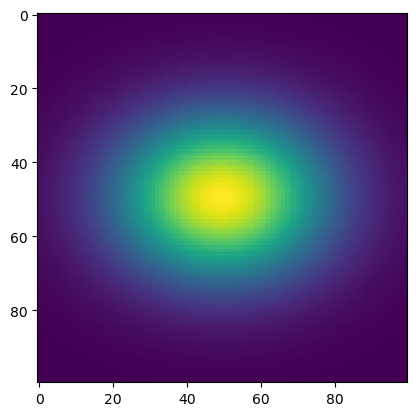

In [8]:
def f(a,b):
    return np.exp(-(0.7*(a-2.5))**2) * np.exp(-(0.9*(b-2.5))**2)

def g(a,b):
    return 10 - np.sqrt(a*a+b*b)

x1 = np.linspace(0, 5, 100)
x2 = np.linspace(0, 5, 100)

X, Y = np.meshgrid(x1, x2)
Z = f(X, Y)

plt.imshow(Z)

# Generate data according to the function

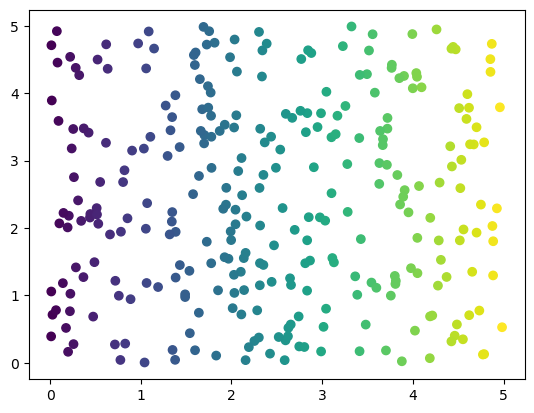

In [9]:
x1 = np.random.random(300) * 5
x2 = np.random.random(300) * 5

# this one is too complex for now
# y = f(x1, x2) # error term?
y = (x1)/10


plt.scatter(x1, x2, c=y);

### Might not be enough datapoints...

# Create perceptron

In [2]:
# activation function and its derivative
def sigm(x):
    return 1/(1+np.exp(-x))

def dsigm(x):
    return np.exp(-x)/(1+np.exp(-x))**2

def relu(x):
    return (x > 0) * x

def drelu(x):
    return (x > 0)

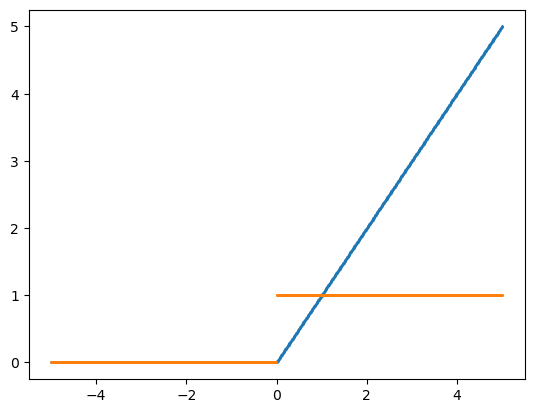

In [3]:
x = np.linspace(-5,5,1000)
plt.scatter(x, relu(x), s=1);
plt.scatter(x, drelu(x), s=1);

In [4]:
class Perceptron:
    """ Simple perceptron for regression. Most things are hardcoded """
    
    def __init__(self):
        # initialize weights
        self.w1, self.w2 = np.random.randn(2)
    
    def eval(self, x1, x2):
        return self._forward_pass(x1, x2)
    
    # fpass for a single point
    def _forward_pass(self, x1, x2, actf=sigm):
        return actf(self.w1 * x1 + self.w2 * x2)

    # derivative of the forward pass
    def _df(self, x1, x2, actf=dsigm):
        return actf(self.w1 * x1 + self.w2 * x2)

    # simple square error
    def loss(self, x1, x2, y_true):
        return np.sum((self._forward_pass(x1, x2) - y_true)**2) 

    # learn over the set (X1,X2, y)
    # iterate over the set and update weights for every forward pass, scaling gradient by lrate
    def learn(self, X1, X2, Y, lrate=0.01):
        for x1, x2, y in zip(X1, X2, Y):
            fpass = self._forward_pass(x1, x2)
            gradient = 2 * (fpass - y) * self._df(x1, x2)
            gradient_w1 = gradient * x1
            gradient_w2 = gradient * x2
            # update weights...
            self.w1 -= lrate * gradient_w1
            self.w2 -= lrate * gradient_w2

In [5]:
perceptron = Perceptron()

print(f"Loss before training: {perceptron.loss(x1, x2, y)}")
y_pred = perceptron.eval(x1, x2)
plt.scatter(x1, x2, c=y_pred)

NameError: name 'x1' is not defined

Loss now: 10.123192737551065


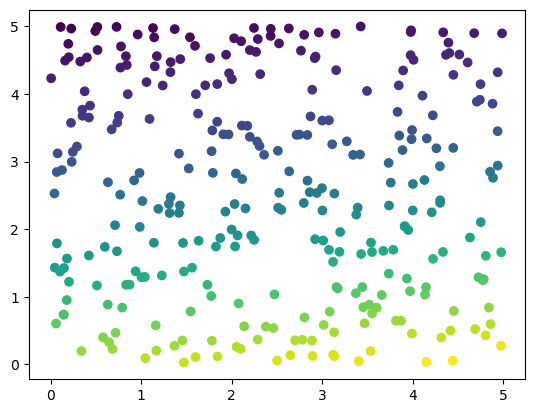

In [8]:
iters = 100
for i in range(iters):
    perceptron.learn(x1, x2, y)
y_pred = perceptron.eval(x1, x2)
plt.scatter(x1, x2, c=y_pred)
print(f"Loss now: {perceptron.loss(x1, x2, y)}")

In [206]:
perceptron.w2

-0.41212617932729395

### Somethings happening...

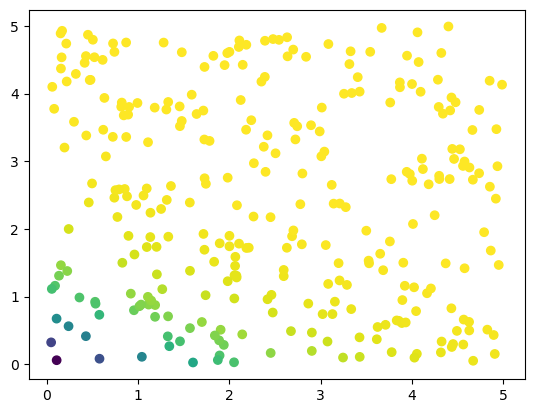

In [153]:
y_pred = perceptron.eval(x1, x2)
plt.scatter(x1, x2, c=y_pred)

In [6]:
class PerceptronRegressor:
    """ Vectorized perceptron for regression. Most things are hardcoded """
    
    def __init__(self, n_inputs, actf, actfd):
        # initialize weights
        self.W = np.random.randn(n_inputs)
        self.actf = actf
        self.actfd = actfd
    
    def eval(self, x):
        return self._forward_pass(x)
    
    # fpass for a single point
    def _forward_pass(self, x):
        return self.actf(np.dot(x, self.W))

    # derivative of the forward pass
    def _df(self, x):
        return self.actfd(np.dot(x, self.W))

    # simple square error
    def loss(self, x, y_true):
        return np.sum((self._forward_pass(x) - y_true)**2) 

    # learn over the set (X1,X2, y)
    # iterate over the set and update weights for every forward pass, scaling gradient by lrate
    def _learn(self, X, Y, lrate=0.01):
        for x, y in zip(X, Y):
            fpass = self._forward_pass(x)
            gradient = 2 * (fpass - y) * self._df(x) * x
#             print(gradient)
            # update weights...
            self.W -= lrate * gradient
        
    def train(self, X, Y, iters=100, lrate=0.01):
        for i in range(iters):
            self._learn(X, Y, lrate)
#             print(f"Step {i}, loss {self.loss(X, Y)}, weights {self.W}")
            

class PerceptronClassifier(PerceptronRegressor):
    def __init__(self, n_inputs):
        super().__init__(n_inputs, sigm, dsigm)
    
    def loss(self, x, y_true):
        y_pred = self._forward_pass(x)
        nll = - y_true * np.log(y_pred) - (1 - y_true) * np.log(1 - y_pred)
        return np.sum(nll)
    
    def _learn(self, X, Y, lrate=0.01):
        for x, y in zip(X, Y):
            y_pred = self._forward_pass(x)
            nll_gradient = -y/y_pred + (1-y)/(1-y_pred)
            gradient = nll_gradient * self._df(x) * x
#             print(gradient)
            self.W -= lrate * gradient

In [83]:
perceptron = PerceptronRegressor(3, relu, drelu)
perceptron.W
X = np.stack([x1, x2, np.ones(x1.shape)], axis=1)
print(perceptron.loss(X, y))

1291.3938268364864


# Let's try something simpler - pure linear regression on one x

In [10]:
y = 13.5*x1 + 3.123*x2 + 4.12
X = np.stack([x1, x2, np.ones(x1.shape)],axis=1)

In [13]:
# perc = PerceptronV(3, lambda x: x, lambda x: 1)
perc = PerceptronRegressor(3, relu, drelu)

print(f"Loss before training: {perc.loss(X, y)}")
perc.train(X, y, iters=10)
print(f"Loss after training: {perc.loss(X, y)}")
print(f"Weights after training: {perc.W}")

Loss before training: 612488.7676916146
Loss after training: 9.28577066537921e-07
Weights after training: [13.50002319  3.12303033  4.11986712]


## ReLU works if coeffs are non-negative

# Works :) good

# Classification + sigmoid act.

## Simplest possible case

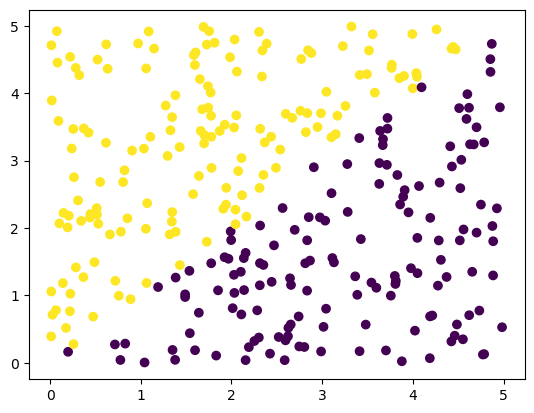

In [46]:
# y_c = ((x1 < 2.5).astype(float) != (x2 < 2.5)).astype(float)
# y_c = (x1 < 2 + x2 < 2).astype(float)
y_c = (x1 < x2).astype(float)
plt.scatter(x1,x2, c=y_c);

In [85]:
perc = PerceptronClassifier(3)

print(f"Loss before training: {perc.loss(X, y_c)}")
perc.train(X, y_c, iters=200)
print(f"Loss after training: {perc.loss(X, y_c)}")
print(f"Weights after training: {perc.W}")

ValueError: operands could not be broadcast together with shapes (300,) (1000,) 

In [48]:
y_pred = perc.eval(X)

[-6.42435247  6.34178889  0.35103368]


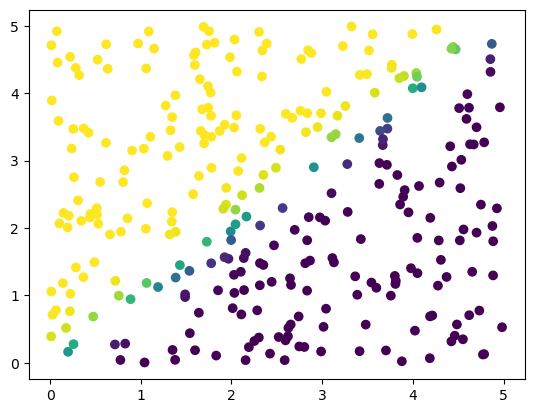

In [49]:
print(perc.W)
plt.scatter(X[:,0], X[:,1], c=y_pred);

# AUC and prediction scores

In [238]:
def get_roc_data(y_pred, y_true, res=100):
    y_pred = y_pred.reshape(-1)
    thresh_range = np.linspace(0, 1, res)
    tpr = []
    fpr = []

    for th in thresh_range:
        y_pred_c = (y_pred > th).astype(int)
        tp = np.sum((y_pred_c == 1) & (y_true == 1))
        tn = np.sum((y_pred_c == 0) & (y_true == 0))
        fp = np.sum((y_pred_c == 1) & (y_true == 0))
        fn = np.sum((y_pred_c == 0) & (y_true == 1))
        tpr.append(tp/(tp + fn))
        fpr.append(fp/(fp + tn))
    return tpr, fpr
    
def print_scores(y_pred, y_true, threshold=0.5):
    y_pred = y_pred.reshape(-1)
    y_pred_c = (y_pred > threshold).astype(int)
    tp = np.sum((y_pred_c == 1) & (y_true == 1))
    tn = np.sum((y_pred_c == 0) & (y_true == 0))
    fp = np.sum((y_pred_c == 1) & (y_true == 0))
    fn = np.sum((y_pred_c == 0) & (y_true == 1))
    print(f"Datapoints {len(y_true)}, threshold {th}, acc: {(tp + tn)/(tp + tn + fp + fn)}, TP: {tp}, FP: {fp}, TN: {tn}, FN: {fn}")


# plot ROC curve
tpr, fpr = get_roc_data(y_pred, y_c)
plt.plot(fpr, tpr);
    
# check some thresholds individually
for th in [0.1, 0.3, 0.5, 0.7, 0.9]:
    print_scores(y_pred, y_c, th)

ValueError: operands could not be broadcast together with shapes (1000,) (300,) 

# Hooray!!!

# Multi-layered version

In [260]:
class MLP:
    _act_f_dict = {
        "SIGMOID": (sigm, dsigm),
        "RELU" : (relu, drelu),
        "NONE": (lambda x: x, lambda x: 1)
    }
    
    def __init__(self, layer_widths, act_f="SIGMOID"):
        self.actf, self.actfd = self._act_f_dict[act_f] # we assume the same act-f for every layer for now
        n_layers = len(layer_widths) - 1
        self.W = [ np.random.randn(layer_widths[i], layer_widths[i+1]) for i in range(n_layers) ]
        
    # input should be of shape (n_cases, first_layer_width)
    # output is of shape (n_cases, last_layer_width)
    def _forward_pass(self, X, intermediate=False):
        layer_activations = [X]
        layer_outputs = []
        
        layer_input = X
        for w in self.W:
            layer_output = np.matmul(layer_input, w)
            layer_activation = self.actf(layer_output)
            if intermediate:
                layer_outputs.append(layer_output)
                layer_activations.append(layer_activation)
            layer_input = layer_activation
        if intermediate:
            return layer_input, layer_outputs, layer_activations[:-1]
        else:
            return layer_input
        
    def predict(self, X):
        return self._forward_pass(X)
    
    def loss(self, X, y_true):
        y_pred = self._forward_pass(X)
        y_pred = y_pred.reshape(-1)
        nll = - y_true * np.log(y_pred) - (1 - y_true) * np.log(1 - y_pred)
        return np.sum(nll)
    
    def train(self, X, Y, iters=100, lrate=0.01):
        for i in range(iters):
            self._learn(X, Y, lrate)
#             print(f"Loss at {i}: {self.loss(X, Y)}")

    def train_batch(self, X, Y, iters=100, lrate=0.01):
        for i in range(iters):
            self._learn_batch(X, Y, lrate)
    
    def _learn(self, X, Y, lrate=0.01):
        for x, y in zip(X, Y):
            x = x.reshape(1, -1)
            y_pred, layer_outputs, layer_activations = self._forward_pass(x, intermediate=True)
            
            nll_gradient = -y/y_pred + (1-y)/(1-y_pred)
            d = nll_gradient * self.actfd(layer_outputs[-1])
            
            W_grads = []
            for i in range(len(self.W)-1, -1, -1):
                W_grads.append(np.outer(layer_activations[i].T, d))
                d = np.matmul(d, self.W[i].T) * self.actfd(layer_outputs[i-1])
                
            W_grads = W_grads[::-1]
            self.W = [W - lrate*grad for W, grad in zip(self.W, W_grads)]
            
    # X is (n_cases, n_features), Y is (n_cases, n_outputs)
    # whole dataset is computed at once
    def _learn_batch(self, X, Y, lrate=0.01):
        Y = Y.reshape(-1, 1)
        y_pred, layer_outputs, layer_activations = self._forward_pass(X, intermediate=True)

        nll_gradient = -Y/y_pred + (1-Y)/(1-y_pred)
        d = nll_gradient * self.actfd(layer_outputs[-1])

        W_grads = []
        for i in range(len(self.W)-1, -1, -1):
            W_grads.append(np.outer(layer_activations[i].T, d))
            d = np.matmul(d, self.W[i].T) * self.actfd(layer_outputs[i-1])

        W_grads = W_grads[::-1]
        self.W = [W - lrate*grad for W, grad in zip(self.W, W_grads)]
        print([w.shape for w in self.W])

# Compare LogReg and NN on a couple of example datasets

In [117]:
x1 = np.random.random(1000)
x2 = np.random.random(1000)
# y = x1**2 - 2*x1 + 3

# y = (x1**2 < x2 - 0.3).astype(int)
y = ((x1 > 0.5) != (x2 > 0.5)).astype(int) # xor example
X = np.stack([x1, x2, np.ones(1000)], axis=1)
# Y = (X[:,0] ** 2 + X[:,1] ** 2 < 0.5).astype(int)
# Y = (X[:, 0] > 2*X[:, 1] + 0.3).astype(int)

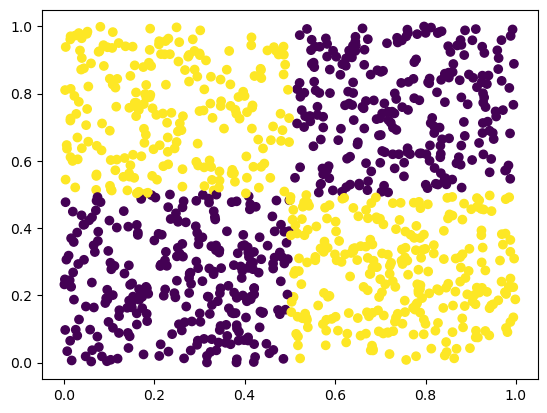

In [118]:
plt.scatter(x1, x2, c=y);

In [213]:
mlp = MLP([3,3,2,1])

In [245]:
print(f"Loss before training: {mlp.loss(X, y)}")
mlp.train(X, y, lrate=0.01)
print(f"Loss after training: {mlp.loss(X, y)}")

Loss before training: 225.78019604713631
Loss after training: 224.33766314301732


In [261]:
mlp2 = MLP([3,3,2,1])

In [259]:
y.shape

(1000,)

In [262]:
print(f"Loss before training: {mlp2.loss(X, y)}")
mlp2.train_batch(X, y, lrate=0.01, iters=5)
print(f"Loss after training: {mlp2.loss(X, y)}")

Loss before training: 712.2339345498942


ValueError: operands could not be broadcast together with shapes (3,3) (3000,3000) 

In [229]:
pc = PerceptronClassifier(3)

In [231]:
print(f"Loss before training: {pc.loss(X, y)}")
pc.train(X, y)
print(f"Loss after training: {pc.loss(X, y)}")

Loss before training: 691.4615904605333
Loss after training: 691.4615905157623


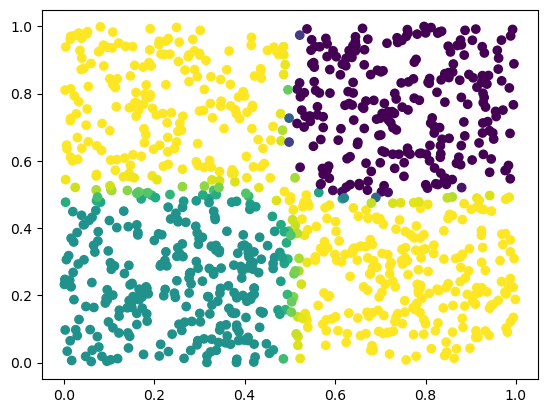

In [246]:
y_pred = mlp.predict(X)
plt.scatter(X[:,0], X[:,1], c=y_pred);

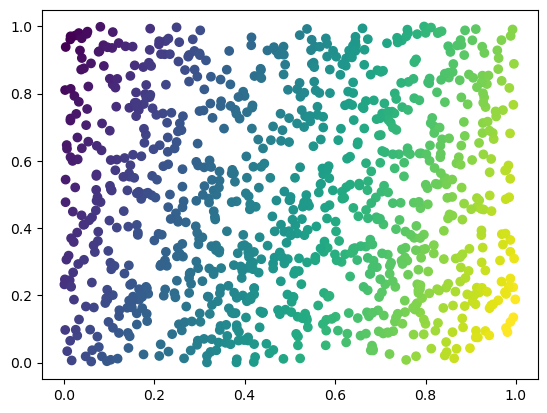

In [233]:
y_pred_pc = pc.eval(X)
plt.scatter(X[:,0], X[:,1], c=y_pred_pc);

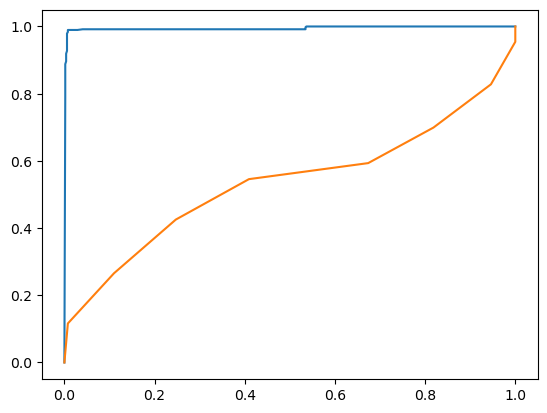

In [241]:
perc_tpr, perc_fpr = get_roc_data(y_pred_pc, y)
nn_tpr, nn_fpr = get_roc_data(y_pred, y)
plt.plot(nn_fpr, nn_tpr);
plt.plot(perc_fpr, perc_tpr);

In [242]:
print("scores for perceptron")
for th in [0.1, 0.3, 0.5, 0.7, 0.9]:
    print_scores(y_pred_pc, y, threshold=th)
print("scores for NN")
for th in [0.1, 0.3, 0.5, 0.7, 0.9]:
    print_scores(y_pred, y, threshold=th)

scores for perceptron
Datapoints 1000, threshold 0.1, acc: 0.482, TP: 482, FP: 518, TN: 0, FN: 0
Datapoints 1000, threshold 0.3, acc: 0.482, TP: 482, FP: 518, TN: 0, FN: 0
Datapoints 1000, threshold 0.5, acc: 0.596, TP: 171, FP: 93, TN: 425, FN: 311
Datapoints 1000, threshold 0.7, acc: 0.518, TP: 0, FP: 0, TN: 518, FN: 482
Datapoints 1000, threshold 0.9, acc: 0.518, TP: 0, FP: 0, TN: 518, FN: 482
scores for NN
Datapoints 1000, threshold 0.1, acc: 0.722, TP: 482, FP: 278, TN: 240, FN: 0
Datapoints 1000, threshold 0.3, acc: 0.721, TP: 480, FP: 277, TN: 241, FN: 2
Datapoints 1000, threshold 0.5, acc: 0.719, TP: 478, FP: 277, TN: 241, FN: 4
Datapoints 1000, threshold 0.7, acc: 0.991, TP: 477, FP: 4, TN: 514, FN: 5
Datapoints 1000, threshold 0.9, acc: 0.962, TP: 447, FP: 3, TN: 515, FN: 35


#  you need 3-3-2-1 network, apparently

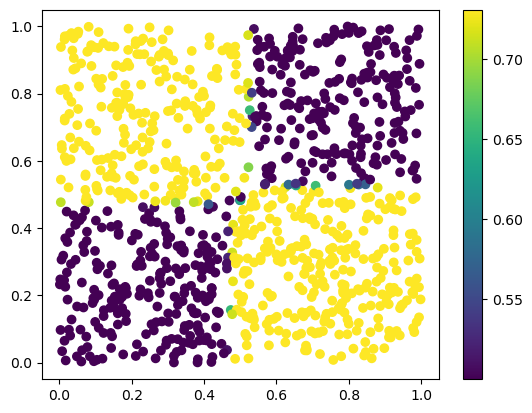

In [252]:
def compute_xor(x1, x2, ones, cutoff=0.5):
    n1 = sigm(50*(x1 - cutoff*ones))
    n2 = sigm(50*(x2 - cutoff*ones))
    n3 = sigm(50*n1 - 50*n2 - 10)
    n4 = sigm(50*n2 - 50*n1 - 10)
    n5 = sigm(n3 + n4)
    return n5

xory = compute_xor(X[:,0], X[:,1], X[:,2])
plt.scatter(X[:,0], X[:,1], c=xory, label=xory);
plt.colorbar();